In [164]:
from droplet_growth import multiwell
import numpy as np
import pims_nd2 as nd
from tqdm.auto import tqdm
from scipy.ndimage import gaussian_filter, binary_erosion, binary_fill_holes, label
from skimage.measure import regionprops, regionprops_table
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [170]:
from nd2shrink import transform
from tifffile import imread
import seaborn as sns
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sys
sys.version

'3.8.1 (default, Jan  8 2020, 16:15:59) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [15]:
def show(bf, cmap='gray', **kwargs):
    plt.figure(figsize=(15,10))
    plt.imshow(bf, cmap=cmap, **kwargs)

In [4]:
test_path = '/Users/andrey/Documents/data-SGR/20200227_4ngml_2x10-3_Elissa.nd2'

In [4]:
test_path = r"Z:\Andrey\data\Salome\20200226_4ngml_2x10-3_Merlin.nd2"

In [179]:
control_bf_path = '/Volumes/Multicell/Andrey/data/Salome/Time_lapse_control_E.coli_20x/FIJI-export/scale0.1/Time_lapse_control_E.coli_20x_C1_Z1_scale0.1.tif'
control_RFP_path = '/Volumes/Multicell/Andrey/data/Salome/Time_lapse_control_E.coli_20x/FIJI-export/scale0.1/Time_lapse_control_E.coli_20x_C2_Z1_scale0.1.tif'
control_GFP_path = '/Volumes/Multicell/Andrey/data/Salome/Time_lapse_control_E.coli_20x/FIJI-export/scale0.1/Time_lapse_control_E.coli_20x_C3_Z1_scale0.1.tif'
# control_path = '/Users/andrey/Documents/data-SGR/Time_lapse_control_E.coli_20x_downscale_16x.tif'

In [216]:
bf_path = '/Volumes/Multicell/Andrey/data/Salome/20200303_4ngml_2x10-3/FIJI-export/scale0.1/20200303_4ngml_2x10_C3_Z1_scale0.1.tif'
RFP_path = '/Volumes/Multicell/Andrey/data/Salome/20200303_4ngml_2x10-3/FIJI-export/scale0.1/20200303_4ngml_2x10_C1_Z1_scale0.1.tif'
GFP_path = '/Volumes/Multicell/Andrey/data/Salome/20200303_4ngml_2x10-3/FIJI-export/scale0.1/20200303_4ngml_2x10_C2_Z1_scale0.1.tif' 
# control_path = '/Users/andrey/Documents/data-SGR/Time_lapse_control_E.coli_20x_downscale_16x.tif'

In [180]:
control_bf_stack = imread(control_bf_path)
control_RFP_stack = imread(control_RFP_path)
control_GFP_stack = imread(control_GFP_path)


In [219]:
bf_stack = imread(bf_path)
RFP_stack = imread(RFP_path)
GFP_stack = imread(GFP_path)


In [73]:
control_bf_stack.shape

(13, 870, 2213)

In [74]:
control_RFP_stack.shape

(13, 870, 2213)

259  regions
42  bad regions
217 good regions


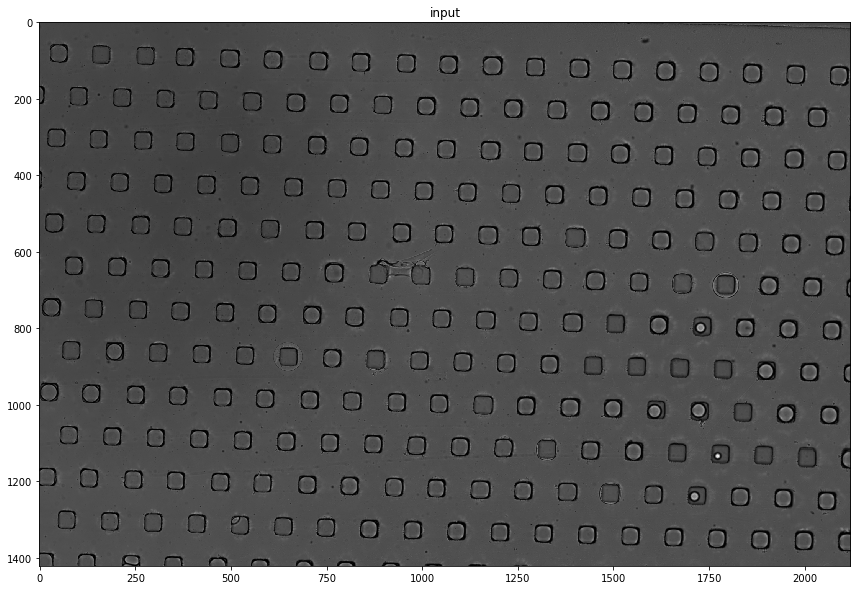

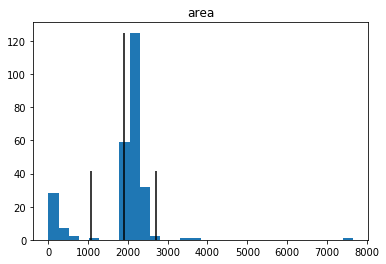

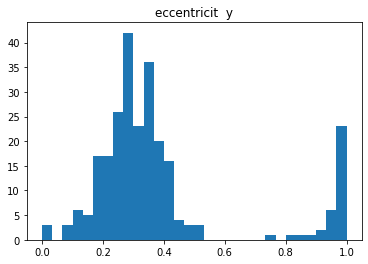

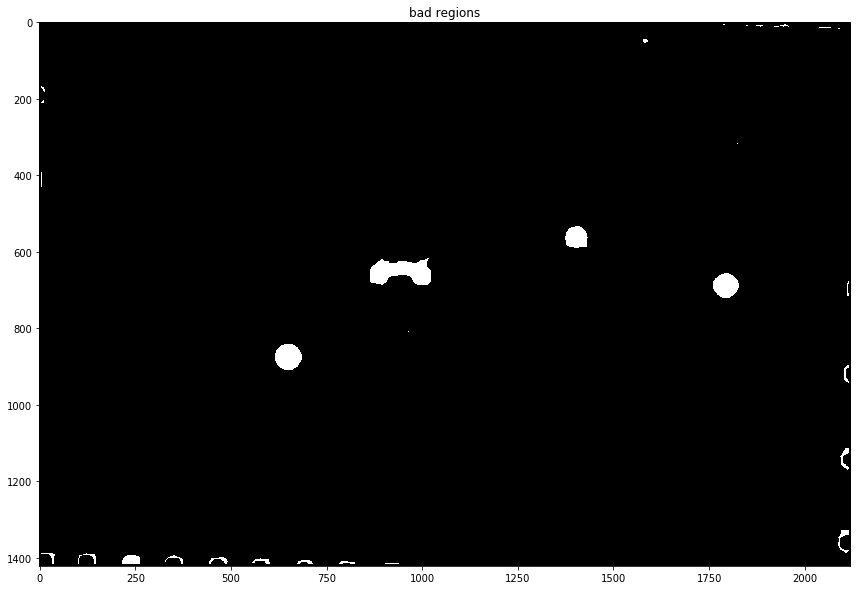

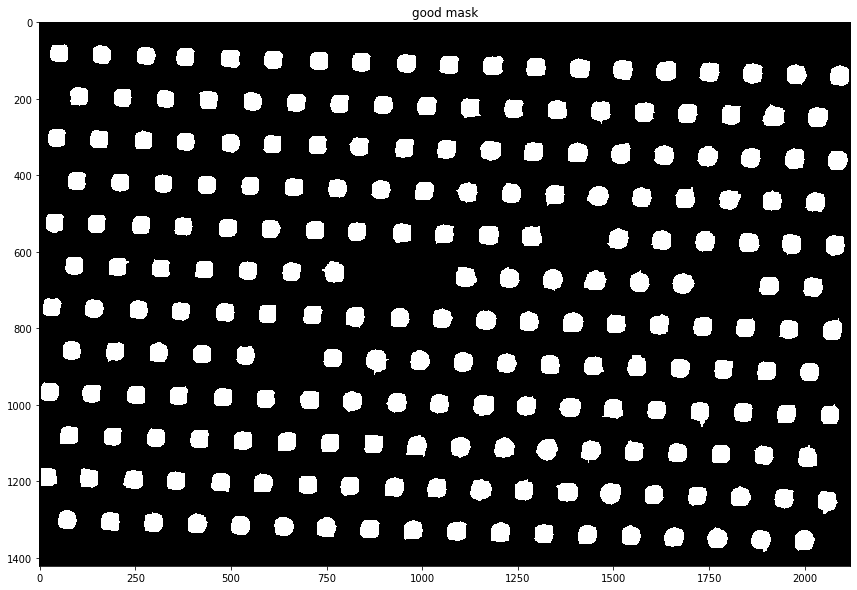

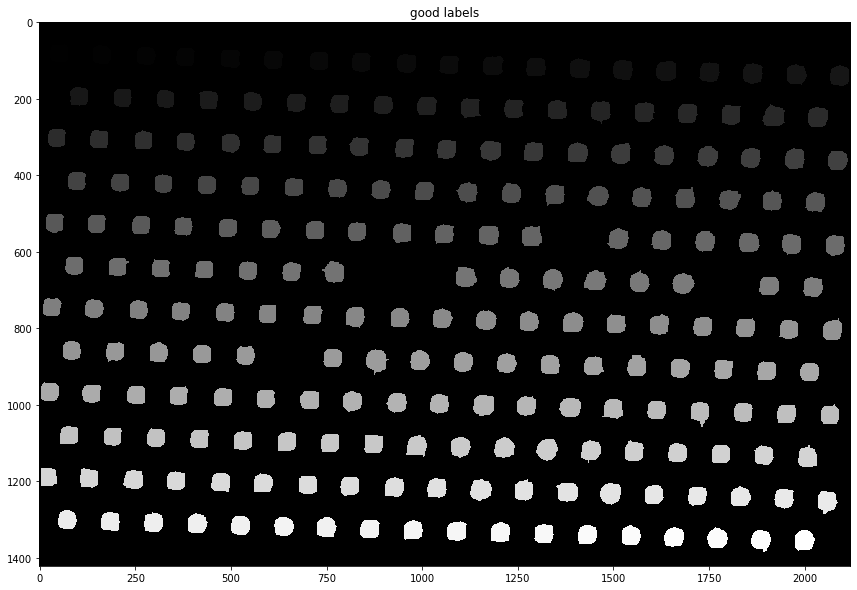

In [312]:
mask = multiwell.get_mask(bf_stack, erode=10)

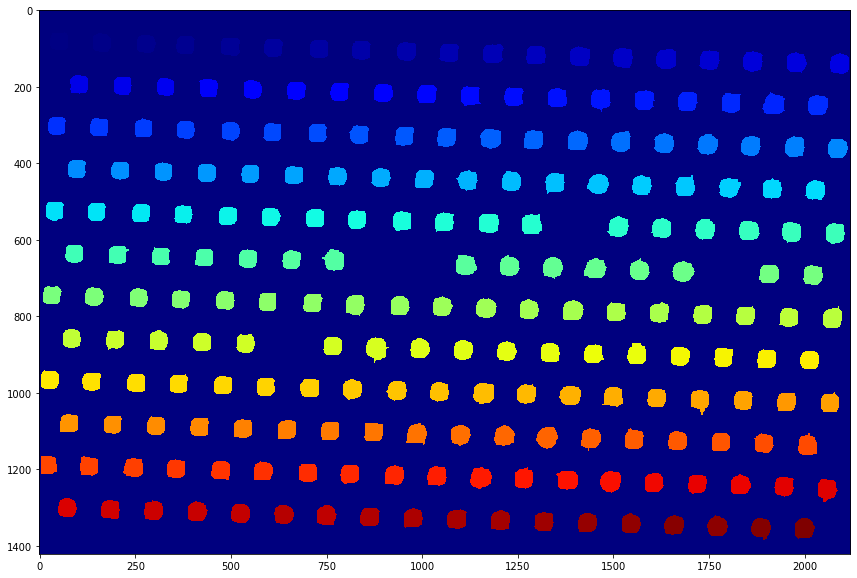

In [313]:
show(mask, cmap='jet')

In [194]:
def get_intensity_table(labelled_mask:np.ndarray, intensity_image_sequence:np.ndarray, plot: bool = True):
    assert (iis := intensity_image_sequence).ndim == 3, f'expected 3D stack for intensity, got shape {iis.shape}'
    df = pd.DataFrame(columns=['time', 'label', 'max_intensity', 'mean_intensity'])

    for t in range(len(iis)):
        dict_li = regionprops_table(labelled_mask, 
                      intensity_image=iis[t], 
                      properties=['label', 'max_intensity', 'mean_intensity'])
        dict_lit = {'time': [t]*len(dict_li['label']), **dict_li}
        df1 = pd.DataFrame.from_dict(dict_lit)
        df = pd.concat([df, df1])
    if plot:
        plot_intensity_vs_time(df)
    return df


(300, 1700)

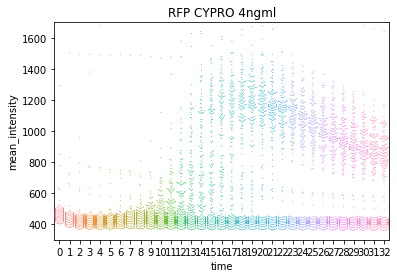

In [314]:
rfp_table = multiwell.get_intensity_table(mask, RFP_stack)
plt.title('RFP CYPRO 4ngml')
plt.ylim(300, 1700)

Text(0.5, 1.0, 'GFP CYPRO 4ngml')

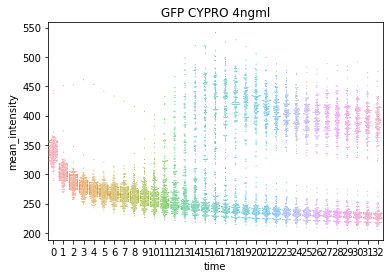

In [242]:
gfp_table = get_intensity_table(mask, GFP_stack)

plt.title('GFP CYPRO 4ngml')

In [303]:
pivot_rfp_grow = rfp_table_grow.pivot(index='time', columns='label', values='mean_intensity')
pivot_gfp_grow = gfp_table_grow.pivot(index='time', columns='label', values='mean_intensity')

pivot_rfp_grow

label,2,3,4,8,9,12,14,15,17,18,19,23,25,26,28,29,30,31,32,34,35,38,42,43,44,45,46,48,52,53,55,56,57,60,62,63,64,66,67,68,69,72,76,77,79,82,85,86,87,89,90,96,97,103,105,106,107,108,110,115,116,118,119,120,124,125,126,127,128,130,133,134,135,136,137,143,144,146,147,148,149,150,151,152,153,154,155,157,161,163,165,166,167,168,172,174,175,176,182,183,186,189,191,194,196,198,199,200,201,202,203,204,205,206,208,209,210,212,213,214,215,217
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,445.898965,478.718687,471.894207,457.721296,451.430929,441.905374,474.801288,448.755260,442.946522,438.934346,467.875275,442.152929,413.738614,452.256008,436.255359,445.302935,406.377296,454.921889,440.338872,478.232238,462.510680,487.197757,452.032533,491.380325,467.376402,464.409113,466.135872,464.618337,456.289982,470.864865,435.000863,470.876110,483.409045,498.672518,466.682793,496.591244,452.117964,482.405505,448.530241,503.293002,475.510381,490.480752,439.049638,462.121305,422.506253,439.084821,442.701493,447.749789,453.723567,439.413187,459.893196,502.488648,477.959020,480.587620,494.807377,507.600546,483.938037,462.859508,456.072634,464.460268,466.609949,467.594714,467.164110,459.413938,778.772187,499.672799,450.269082,497.959880,475.457238,486.908461,554.835214,471.090367,463.202959,441.518276,477.919243,459.432314,496.861629,490.765748,468.548708,464.555666,492.755654,454.932616,485.070534,489.209655,457.811670,499.276069,477.346172,1292.134847,503.051675,458.979094,419.895190,455.423152,440.913340,443.489491,441.456718,487.105691,453.365821,459.632952,463.004327,503.219888,491.721095,471.495425,482.682540,482.575574,490.244545,631.302035,3536.537527,430.445050,429.208955,400.386471,445.244170,424.701095,446.924707,440.704450,451.374010,438.891964,426.172983,427.306180,452.443418,425.746908,459.333030,498.903762
1,412.492854,442.243939,436.412091,425.735588,419.910420,411.582453,445.296996,417.513096,412.345652,413.884770,436.761569,415.299404,386.522772,420.078470,406.736719,413.431151,379.414979,424.801090,409.477044,444.112789,428.951345,458.853721,422.540541,454.830122,437.731838,435.653417,433.414198,433.477186,423.978471,438.785929,407.815789,440.460480,449.166332,468.830993,434.540150,464.794393,423.588350,451.663761,419.274670,468.132731,443.830450,457.001750,414.126680,434.678899,396.751376,413.365575,417.775693,422.266272,424.511677,411.619780,430.915159,470.871001,447.996002,447.752405,459.145902,479.786624,452.889643,442.482689,429.360614,434.759375,445.275686,444.454626,439.314737,432.114610,662.570448,468.477880,421.704348,470.048646,446.713330,457.543790,519.493980,450.000000,440.674064,418.127929,450.022150,433.523532,475.533857,463.924705,441.809642,435.988072,465.040806,426.716425,456.855684,462.173333,433.212524,469.503795,450.135035,1502.622799,475.186603,432.920358,396.578734,431.168774,421.393866,425.747781,414.139766,451.802439,434.601691,437.171625,436.983173,474.914099,463.934403,444.560384,455.828246,451.816606,467.942727,649.132285,2732.714534,412.450990,407.955224,380.245033,422.850480,405.028558,423.304779,417.895550,428.830461,417.254018,404.077575,407.011236,427.807390,403.148852,433.481802,728.497813
2,399.498768,428.304040,420.648866,411.003811,406.958510,398.984382,431.562661,403.802920,399.098261,400.629745,421.750551,403.713009,375.582673,408.115743,394.535881,400.120090,367.653792,411.308356,396.467425,426.923623,414.744858,445.649847,410.077077,440.130325,425.313018,422.525448,419.951575,419.365885,408.824692,425.285285,394.992235,428.773091,434.843719,453.076229,420.522195,453.415150,411.476260,437.770183,406.011824,452.190519,430.762976,440.890201,402.457084,423.382263,385.386693,402.641369,406.041791,409.748943,412.160510,398.472967,417.658053,456.703818,434.104948,433.533668,444.230328,465.989536,438.031660,432.466633,418.048593,421.920536,433.911204,432.587665,426.100883,419.657011,614.735590,453.962768,409.001932,457.82

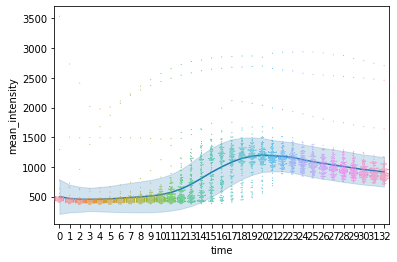

In [274]:
plot_intensity_vs_time(rfp_table_grow)
plot = plot_intensity_line(rfp_table_grow)

(300, 1600)

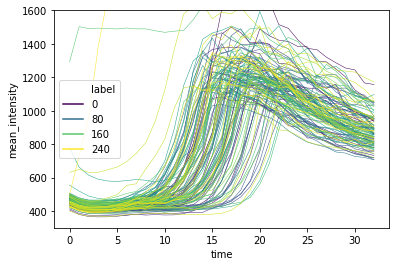

In [299]:
plot_intensity_raw_line(rfp_table_grow, lw=0.5, hue='label', palette="viridis")
plt.ylim(300,1600)

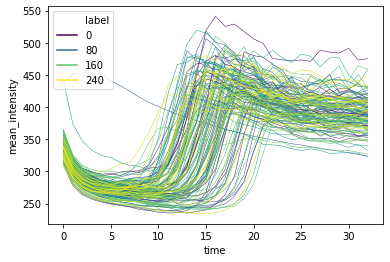

In [298]:
plot_intensity_raw_line(gfp_table_grow.sort_index(), lw=0.5, hue='label', palette="viridis")

<ipython-input-258-eef7cd595627>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[table[table.time == time].mean_intensity > min_intensity]


Text(0.5, 1.0, 'CYPRO 4ngml only grow')

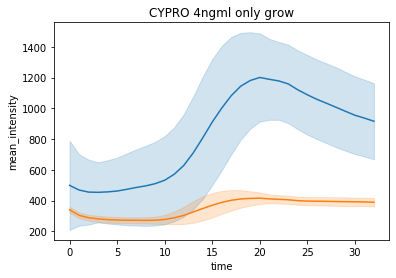

In [278]:
rfp_table_grow = filter_table_by_intensity(rfp_table, 32, 700)
gfp_table_grow = filter_table_by_intensity(gfp_table, 32, 300)

plot_intensity_line(rfp_table_grow)
plot_intensity_line(gfp_table_grow)
plt.title('CYPRO 4ngml only grow')

<ipython-input-265-561d483548e0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[table[table.time == time].mean_intensity < max_intensity]


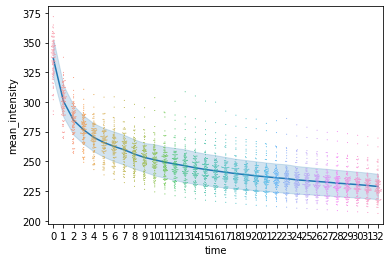

In [275]:
gfp_bg = filter_table_by_max_intensity(gfp_table, 32, 300)
plot_intensity_line(gfp_bg)
plot_intensity_vs_time(gfp_bg)

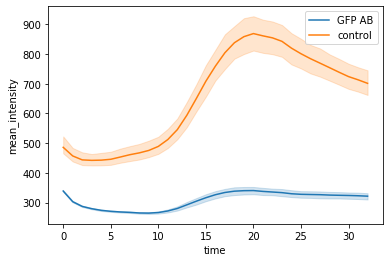

In [276]:
sns.lineplot(data=gfp_table, x='time', y='mean_intensity', label='GFP AB')
sns.lineplot(data=rfp_table, x='time', y='mean_intensity', label='control')


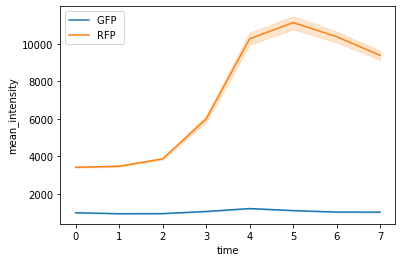

In [277]:
sns.lineplot(data=control_gfp_table, x='time', y='mean_intensity', label='GFP ')
sns.lineplot(data=control_rfp_table, x='time', y='mean_intensity', label='RFP')


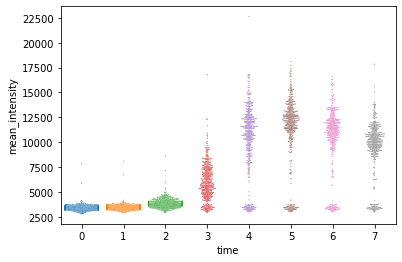

In [230]:
control_rfp_table = get_intensity_table(good_labels, control_RFP_stack[:8])

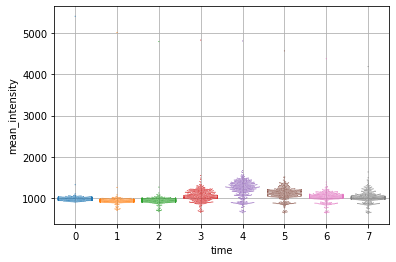

In [263]:
control_gfp_table = get_intensity_table(good_labels, control_GFP_stack[:8])
plt.grid()

In [237]:
control_gfp_table = control_gfp_table.query('mean_intensity< 2000')

Text(0.5, 1.0, 'control_RFP')

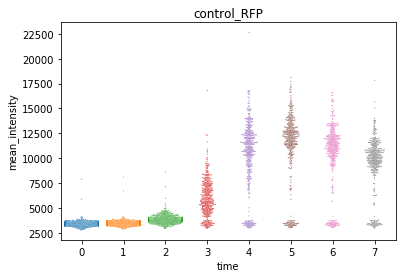

In [232]:
plot_intensity_vs_time(rfp_table)
plt.title('control_RFP')

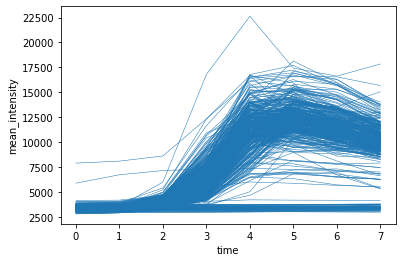

In [286]:
plot_intensity_raw_line(control_rfp_table, lw=0.5)

Text(0.5, 1.0, 'control_GFP')

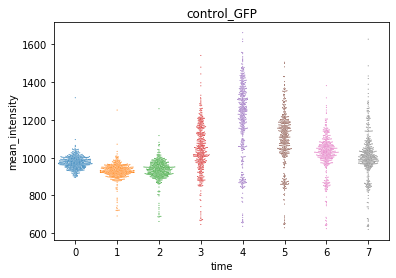

In [233]:
plot_intensity_vs_time(gfp_table)
plt.title('control_GFP')

<ipython-input-258-eef7cd595627>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return table[table[table.time == time].mean_intensity > min_intensity]


Text(0.5, 1.0, 'CYPRO 4ngml only grow')

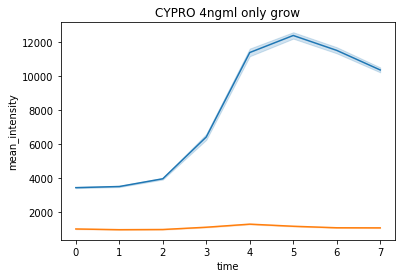

In [264]:
rfp_control_table_grow = filter_table_by_intensity(control_rfp_table, 7, 5000)
gfp_control_table_grow = filter_table_by_intensity(control_gfp_table, 7, 900)

plot_intensity_line(rfp_control_table_grow)
plot_intensity_line(gfp_control_table_grow)
plt.title('CYPRO 4ngml only grow')